### Importing Libraries

In [47]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns
import statistics
import sort_dataframeby_monthorweek
%matplotlib inline

### Importing Data

In [4]:
turbine_df = pd.read_csv("T1.csv")
turbine_df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


### Data Distribution

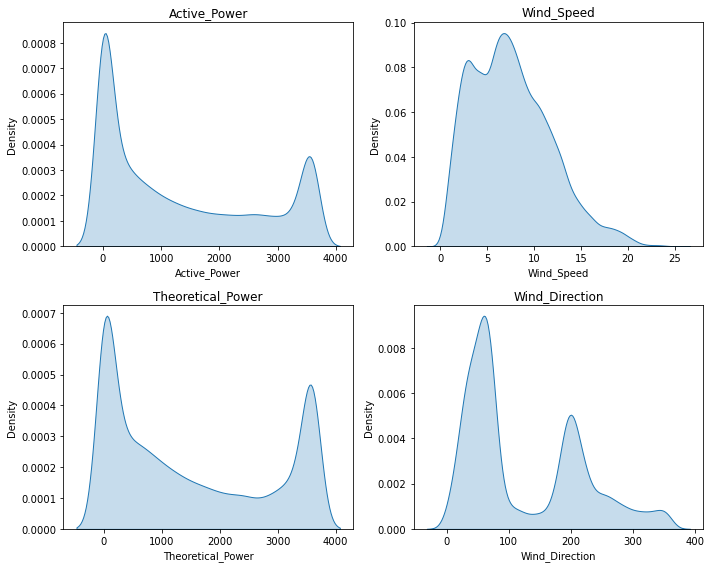

In [41]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(turbine_df.iloc[:,i+1], shade=True)
    plt.title(turbine_df.columns[i+1])
plt.tight_layout()
plt.show()

### Renaming the column name (can be easily used in data manipulation)

In [11]:
turbine_df.info()
turbine_df.rename(columns={'Date/Time':'Time'},inplace=True)
turbine_df.rename(columns={'LV ActivePower (kW)':'Active_Power'},inplace=True)
turbine_df.rename(columns={'Wind Speed (m/s)':'Wind_Speed'},inplace=True)
turbine_df.rename(columns={'Theoretical_Power_Curve (KWh)':'Theoretical_Power'},inplace=True)
turbine_df.rename(columns={'Wind Direction (°)':'Wind_Direction'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time                           50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
 5   Month                          50530 non-null  object 
dtypes: float64(4), object(2)
memory usage: 2.3+ MB


### Data Correlation with Cumulative Variance

In [42]:
corr_df = turbine_df[['Active_Power','Theoretical_Power','Wind_Speed','Wind_Direction']]
corr_matrix = corr_df.corr()
print(corr_matrix)

from sklearn.decomposition import PCA
my_model = PCA(n_components=4)
my_model.fit_transform(corr_df.values)

print ("Cumulative Variance : ", my_model.explained_variance_ratio_.cumsum()*100)

                   Active_Power  Theoretical_Power  Wind_Speed  Wind_Direction
Active_Power           1.000000           0.949918    0.912774       -0.062702
Theoretical_Power      0.949918           1.000000    0.944209       -0.099076
Wind_Speed             0.912774           0.944209    1.000000       -0.077188
Wind_Direction        -0.062702          -0.099076   -0.077188        1.000000
Cumulative Variance :  [ 97.26561937  99.76275115  99.99994754 100.        ]


### Finding Month and adding into existing data frame

In [6]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"  

In [12]:
#add months
turbine_df['Month']=turbine_df.Time.apply(find_month)
turbine_df.head()

,Time,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


### Data Cleaning and Removing unncessary columns from Data Frame

In [43]:
del turbine_df['Wind_Speed']
del turbine_df['Wind_Direction']

df_clean = turbine_df.sort_values("Time")
df_clean["Loss_Value"]=df_clean["Theoretical_Power"]-df_clean["Active_Power"]
df_clean["Loss(%)"]=df_clean["Loss_Value"]/df_clean["Theoretical_Power"]*100
#round the values to 2 digit.
df_clean=df_clean.round({'Active_Power': 2, 'Theoretical_Power': 2,'Loss_Value': 2, 'Loss(%)': 2})
del df_clean['Time']
df_clean.head()

,Active_Power,Theoretical_Power,Month,Loss_Value,Loss(%)
0,380.05,416.33,Jan,36.28,8.71
1,453.77,519.92,Jan,66.15,12.72
2,306.38,390.90,Jan,84.52,21.62
3,419.65,516.13,Jan,96.48,18.69
4,380.65,491.70,Jan,111.05,22.59


### Aggregating the data on the basis of month

In [45]:
df_rank = df_clean.groupby('Month').agg(['mean', 'std'])
print(df_rank)
df_month = df_clean.groupby('Month')

       Active_Power              Theoretical_Power               Loss_Value  \
               mean          std              mean          std        mean   
Month                                                                         
April    824.358562  1193.657141        955.690151  1282.557024  131.331561   
August  1978.188843  1183.497237       2220.579144  1229.762474  242.390325   
Dec     1176.785858  1374.223195       1424.063515  1395.610556  247.277693   
Feb     1503.354965  1427.411851       1712.709995  1412.944515  209.354998   
Jan     1323.158004  1416.651750       1847.287949  1412.677834  524.130003   
July     477.014243   623.399179        583.709290   751.687601  106.695018   
June     995.490335  1090.078636       1139.291322  1205.494103  143.801008   
March   1952.405772  1461.628665       2075.819816  1473.178956  123.414087   
May      836.941964   967.624627        960.203574  1073.393726  123.261589   
Nov     1886.693866  1269.787719       2030.027650  

### Selecting Mean data of Active Power and Theoretical Power in separate DF

In [66]:
df_active = df_month['Active_Power'].mean()
df_theo = df_month['Theoretical_Power'].mean()
## Saving Data as Backup
df_active.to_csv('active_mean.csv')
df_theo.to_csv('theoretical_power_mean.csv')

### Construction of Control Charts

In [67]:
df_active = pd.read_csv("active_mean.csv")
df_theo = pd.read_csv("theoretical_power_mean.csv")
## Sorting data on the basis of Months
df_active = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=df_active,monthcolumnname='Month')
df_theo = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=df_theo,monthcolumnname='Month')

## X data Series for both Active and Theoretical
x_active = pd.Series(df_active['Active_Power'])
x_theo = pd.Series(df_theo['Theoretical_Power'])
months = df_active['Month'].to_numpy()

In [68]:
# Define list variable for moving ranges
MR = [np.nan]

# Get and append moving ranges
i = 1
for data in range(1, len(x_theo)):
    MR.append(abs(x_theo[i] - x_theo[i-1]))
    i += 1

# Convert list to pandas Series objects    
MR = pd.Series(MR)

In [69]:
# Concatenate mR Series with and rename columns
data_active = pd.concat([x_active,MR], axis=1).rename(columns={'Active_Power':"x", 0:"mR"})
data_theo = pd.concat([x_theo,MR], axis=1).rename(columns={'Theoretical_Power':"x", 0:"mR"})

#### Control Limits are calculated from Theoretical Power

In [76]:
# Control Limits For individual chart 
print("Control Limits : ")
CL = data_theo['x'].mean()
UCL = data_theo['x'].mean() + 3*(data_theo['mR'].mean())/1.128
LCL = data_theo['x'].mean() - 3*(data_theo['mR'].mean())/1.128
print(f'CL For individual chart : {CL}')
print(f'UCL For individual chart: {UCL}')
print(f'LCL For individual chart: {LCL}')

print("---------------------------------------------------")
# Control Limits For mR chart
mR_CL = data_theo['x'].mean()
mR_UCL = data_theo['x'].mean() + 3*(data_theo['mR'].mean())*0.8525
mR_LCL = data_theo['x'].mean() - 3*(data_theo['mR'].mean())*0.8525
print(f'CL For mR chart : {mR_CL}')
print(f'UCL For mR chart: {mR_UCL}')
print(f'LCL For mR chart: {mR_LCL}')

Control Limits : 
CL For individual chart : 1503.0739381568362
UCL For individual chart: 2901.060135664016
LCL For individual chart: 105.08774064965655
---------------------------------------------------
CL For mR chart : 1503.0739381568362
UCL For mR chart: 2847.40542540369
LCL For mR chart: 158.74245090998215


#### Active power points are plotted with Theoretical Power Control Limits

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Active Power')]

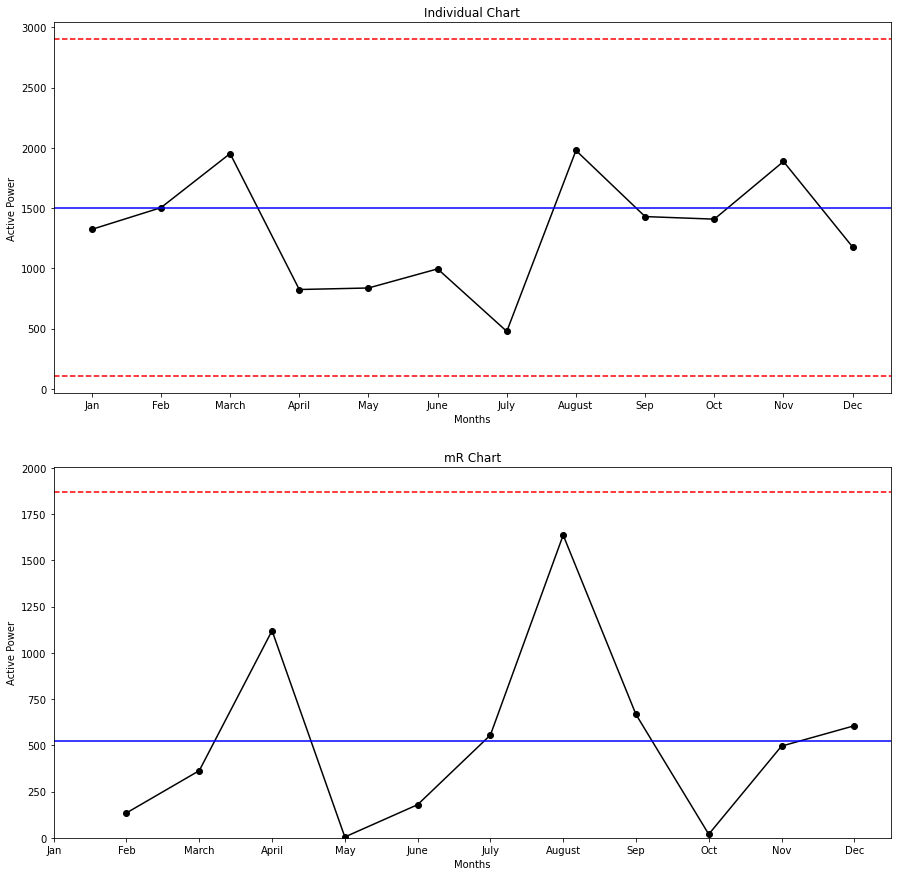

In [72]:
# Plot x and mR charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x chart
axs[0].plot(data_active['x'], linestyle='-', marker='o', color='black')
axs[0].axhline(CL, color='blue')
axs[0].axhline(UCL, color = 'red', linestyle = 'dashed')
axs[0].axhline(LCL, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set_xticks(range(0,len(months)))
axs[0].set_xticklabels(months)
axs[0].set(xlabel='Months', ylabel='Active Power')

# mR chart
axs[1].plot(data_active['mR'], linestyle='-', marker='o', color='black')
axs[1].axhline(mR_CL), color='blue')
axs[1].axhline(mR_UCL, color='red', linestyle ='dashed')
axs[1].axhline(mR_LCL, color='red', linestyle ='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('mR Chart')
axs[1].set_xticks(range(0,len(months)))
axs[1].set_xticklabels(months)
axs[1].set(xlabel='Months', ylabel='Active Power')


### Validating the points out of control

In [79]:
# x chart
i = 0
control = True
for unit in data_active['x']:
    if unit > statistics.mean(data_theo['x'])+3*statistics.mean(data_theo['mR'][1:len(data_theo['mR'])])/1.128 or unit < statistics.mean(data_theo['x'])-3*statistics.mean(data_theo['mR'][1:len(data_theo['mR'])])/1.128:
        print('Unit', i, 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within Theoretical Power control limits.')

# mR chart
i = 0
control = True
for unit in data_active['mR']:
    if unit > statistics.mean(data_theo['mR'][1:len(data_theo['mR'])])+3*statistics.mean(data_theo['mR'][1:len(data_theo['mR'])])*0.8525 or unit < statistics.mean(data_theo['mR'][1:len(data_theo['mR'])])-3*statistics.mean(data_theo['mR'][1:len(data_theo['mR'])])*0.8525:
        print('Unit', i, 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within Theoretical Power control limits.')

All points within Theoretical Power control limits.
All points within Theoretical Power control limits.
